# Soru 1: Pandas kütüphanesiyle bir DataFrame oluşturup ve içine Levels of Measurements'ları nominal, ordinal, interval ve ratio olan kolonlar ekleyelim.

In [1]:
import pandas as pd

data_set = { # numerical
            'Age': [15, 45, 23, 45, 58, 17, 46, 25, 28, 33],
            'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female'],
            # nominal
            'Eye Color': ['Brown', 'Black', 'Blue', 'Green', 'Brown', 'Black', 'Blue', 'Green', 'Blue', 'Blue'],
            # ordinal
            'Degree': ['Bachelor\'s Degree', 'Master\'s Degree', 'High School', 'Bachelor\'s Degree',
                       'Master\'s Degree', 'High School', 'Bachelor\'s Degree', 'Master\'s Degree', 'High School',
                       'High School'],
            # interval
            'Level of IQ': [67, 110, 160, 99, 90, 85, 118, 123, 135, 98],
            #ratio
            'Weight': [66, 67, 70, 56, 78, 90, 98, 82, 50, 114]
            }

df = pd.DataFrame(data_set)
print(df)

   Age  Gender Eye Color             Degree  Level of IQ  Weight
0   15  Female     Brown  Bachelor's Degree           67      66
1   45    Male     Black    Master's Degree          110      67
2   23  Female      Blue        High School          160      70
3   45    Male     Green  Bachelor's Degree           99      56
4   58  Female     Brown    Master's Degree           90      78
5   17    Male     Black        High School           85      90
6   46    Male      Blue  Bachelor's Degree          118      98
7   25    Male     Green    Master's Degree          123      82
8   28  Female      Blue        High School          135      50
9   33  Female      Blue        High School           98     114


# Soru 2: Ekli data üzerindeki aşağıda yer alan kolonların count, mean, std, min, 25%, 50%, 75%, max değerlerini ve IQR metoduyla outlier kalan veri sayısını çıkartıp, bu değerleri sözel ve karşılaştırmalı olarak yorumlayalım.

In [14]:
import numpy as np
import pandas as pd

df = pd.read_csv("data.csv")


# data mean, std, min, max, 25%, 50%, 75% values of data set
def data_to_describe():
    new_data = {'radius_mean': df['radius_mean'], 'area_mean': df['area_mean'],
                'compactness_mean': df['compactness_mean']}
    new_data_frame = pd.DataFrame(new_data)
    vertical_stack = pd.concat([new_data_frame.describe()], axis=1)
    return vertical_stack


# IQR Outlier List #
def iqr(var):
    q1 = np.quantile(df[var].sort_values(), 0.25)
    q3 = np.quantile(df[var].sort_values(), 0.75)
    diff = q3 - q1
    lower_t = q1 - (1.5 * diff)
    upper_t = q3 + (1.5 * diff)
    print("Q1: ", q1)
    print("Q2: ", q3)
    print("IQR value: ", diff)
    print("Lower outlier bound: ", lower_t)
    print("Upper outlier bound: ", upper_t)
    print("IQR value: ", diff)
    return df[(df[var] < lower_t) | (df[var] > upper_t)]


def star():
    print("\n***********************************************\n")


print(data_to_describe())
star()
print("Outlier number of radius_mean: ", len(iqr('radius_mean')))
star()
print("Outlier number of area_mean: ", len(iqr('area_mean')))
star()
print("Outlier number of compactness_mean: ", len(iqr('compactness_mean')))
star()


       radius_mean    area_mean  compactness_mean
count   569.000000   569.000000        569.000000
mean     14.127292   654.889104          0.104341
std       3.524049   351.914129          0.052813
min       6.981000   143.500000          0.019380
25%      11.700000   420.300000          0.064920
50%      13.370000   551.100000          0.092630
75%      15.780000   782.700000          0.130400
max      28.110000  2501.000000          0.345400

***********************************************

Q1:  11.7
Q2:  15.78
IQR value:  4.08
Lower outlier bound:  5.579999999999999
Upper outlier bound:  21.9
IQR value:  4.08
Outlier number of radius_mean:  14

***********************************************

Q1:  420.3
Q2:  782.7
IQR value:  362.40000000000003
Lower outlier bound:  -123.30000000000001
Upper outlier bound:  1326.3000000000002
IQR value:  362.40000000000003
Outlier number of area_mean:  25

***********************************************

Q1:  0.06492
Q2:  0.1304
IQR value:  0.0654

Öncelikle data sette verilen, incelememiz istenen sütunların neyi temsil ettiklerini bilmek yorum yapabilmek adına çok önemli. Bu sebeple; radius_mean'le başlayacak olursak, bu sütun bize kanserli hücrelerin tespit edilen yarıçapını, area_mean ise bu tespit edilen hücrelerin alan bilgisini, compactness_mean de hücre kompaktlığını yani yoğunluğunu vermektedir. Yarıçap ve alan bilgisi kanserli hücre tespitinde önemli rol oynamaktadır. Yapılan araştırmalara göre iyi huylu hücreler genel olarak kanserli hücrelerden daha küçük yarıçapa sahip olma eğilimindedir. compactness_mean faktörü de yapılan araştırmalarda prognostik yani hastalığın seyrini belirleyen özellik olarak nitelendirilmiştir. 568 adet veriden radius_mean'de 14, area_mean'de 25, compactness_mean'de de 16 tanesinin outlier olması elimizdeki verilerin radius_mean için %2.5, area_mean için %4.4, compactness_mean içinse %2.82'sinin outlier olduğunu göstermektedir. Lower_outlier olarak belirlenen değerlerin, tüm bu veriler göz önüne alındığında kanserli hücre olma ihtimallerinin çok daha düşük olması sebebiyle data set'ten silinmesi daha doğru olacaktır. Aynı durum upper_outlier için de geçerlidir.

# Soru 3: Ekli data üzerindeki aşağıda yer alan kolonların birbiriyle olan korelasyonlarını, covaryanslarını, Pearson Correlation Coefficientlarını, Spearman Rank Coefficientlarını ve Effect Size'larını bularak sözel ve karşılaştırmalı olarak yorumlayalım.

In [12]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import pingouin as pg


def star():
    print("\n********************************************************************\n")


data_set = pd.read_csv("data.csv")
col1 = data_set['radius_mean']
col2 = data_set['area_mean']
col3 = data_set['compactness_mean']

# correlation of samples
columns = data_set[['radius_mean', 'area_mean', 'compactness_mean']]
print("Corr",columns.corr())

star()
# covariance of samples
print("Cov", columns.cov())
star()
# pearson
pcc_1_2, _ = pearsonr(col1, col2)
pcc_1_3, _ = pearsonr(col1, col3)
pcc_2_3, _ = pearsonr(col2, col3)
print("Pearson Correlation Coefficient of radius_mean and area_mean: ", pcc_1_2)
print("Pearson Correlation Coefficient of radius_mean and compactness_mean: ", pcc_1_3)
print("Pearson Correlation Coefficient of area_mean and compactness_mean: ", pcc_2_3)
star()
#spearman
spr_1_2, _ = spearmanr(col1, col2)
spr_1_3, _ = spearmanr(col1, col3)
spr_2_3, _ = spearmanr(col2, col3)
print("Spearman Rank Coefficient of radius_mean and area_mean: ", pcc_1_2)
print("Spearman Rank Coefficient of radius_mean and compactness_mean: ", pcc_1_3)
print("Spearman Rank Coefficient of area_mean and compactness_mean: ", pcc_2_3)
star()
# effect sizes of samples
e_size1_2 = pg.compute_effsize(col1, col2, eftype='cohen')
e_size1_3 = pg.compute_effsize(col1, col3, eftype='cohen')
e_size2_3 = pg.compute_effsize(col2, col3, eftype='cohen')
print("Effect size of radius_mean and area_mean: ", e_size1_2)
print("Effect size of of radius_mean and compactness_mean: ", e_size1_3)
print("Effect size of of area_mean and compactness_mean: ", e_size2_3)

Corr                   radius_mean  area_mean  compactness_mean
radius_mean          1.000000   0.987357          0.506124
area_mean            0.987357   1.000000          0.498502
compactness_mean     0.506124   0.498502          1.000000

********************************************************************

Cov                   radius_mean      area_mean  compactness_mean
radius_mean         12.418920    1224.483409          0.094197
area_mean         1224.483409  123843.554318          9.264931
compactness_mean     0.094197       9.264931          0.002789

********************************************************************

Pearson Correlation Coefficient of radius_mean and area_mean:  0.9873571700566124
Pearson Correlation Coefficient of radius_mean and compactness_mean:  0.5061235775263636
Pearson Correlation Coefficient of area_mean and compactness_mean:  0.49850168215241175

********************************************************************

Spearman Rank Coefficient of ra

### Korelasyonlar ve Kovaryanslar Hakkında
Radius_mean ile area_mean arasında 0.98'lik gayte büyük bir korelasyon var. Bu durum parametrelerin birbirine ne kadar bağlı ve bağımlı olduğunun göstergesi. Zaten radius_mean hücrenin yarıçapı, area_mean'in de bu hücrenin alanı olduğunu bildiğimiz için Alan = pi x r x r formülünden de yarıçap arttıkça alanın da artacağını öngörebiliriz.

compactness_mean formülün perimeter^2 / area - 1.0) (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) olduğu için kendisinin area_mean ve radius_mean ile de korelasyon halinde olmasını bekleriz. Bu 3 parametre arasında pozitif bir korelasyon mevcuttur ancak radius_mean ile area_mean arasındaki kadar güçlü değildir.

Eğer veriler arasında korelasyon varsa, değişkenlerden biri artıyor/azalıyor iken diğeri de artıyor/azalıyor anlamına gelir. Bu değişim, “kovaryans” ile ölçülür. Kovaryans  birlikte değişmek anlamındadır ve değişkenler arasındaki ilişkinin yönünü analiz etmek için kullanılır. Kovaryansın pozitif olması bu parametrelerin korelasyon içinde olduğunu gösterir.


### Pearson Hakkında
Pearson Correlation Coefficient, iki sürekli değişken arasındaki istatistiksel ilişkiyi veya ilişkiyi ölçen test istatistikleridir. Kovaryans yöntemine dayandığından, ilgilenilen değişkenler arasındaki ilişkiyi ölçmenin en iyi yöntemi olarak bilinir. İlişkinin büyüklüğünün veya korelasyonun yanı sıra ilişkinin yönü hakkında da bilgi verir.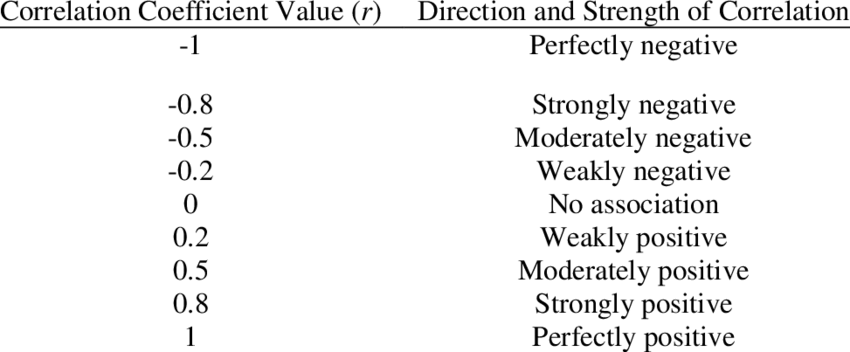

Tablodaki verilerden de anlaşılacağı üzere pearson correlation coefficient'a göre;
radius_mean ile area_mean arasında **Perfectly Positive**, 
radius_mean ile compactness_mean arasında **Moderately Positive**
area_mean ile compactness_mean arasında **Weakly Positive** ilişki bulunmaktadır.

### Spearman Hakkında
Spearman Rank Coefficient, iki değişken arasındaki ilişki derecesini ölçmek için kullanılan parametrik olmayan bir testtir. Verilerin dağılımı hakkında herhangi bir varsayım taşımaz ve değişkenler en azından sıralı bir ölçekte ölçüldüğünde uygun korelasyon analizidir. Bu analizin yapılabilmesi için bir değişkendeki değerlerin diğer değişkenle monoton olarak ilişkili olması gerekir. 

### Effect Size Hakkında
Effect Size, değişkenler arasındaki ilişkinin veya gruplar arasındaki farkın ne kadar anlamlı olduğunu söyler. Bir araştırma sonucunun pratik önemini gösterir.

Büyük effect size, bir araştırma bulgusunun pratik öneme sahip olduğu anlamına gelirken, küçük etki büyüklüğü sınırlı pratik uygulamaları gösterir.Cohen's d, iki grup arasındaki farkın boyutunu ölçer. İki ortalama arasındaki farkı alır ve standart sapma birimlerinde ifade eder. İki araç arasında kaç tane standart sapma olduğunu söyler. 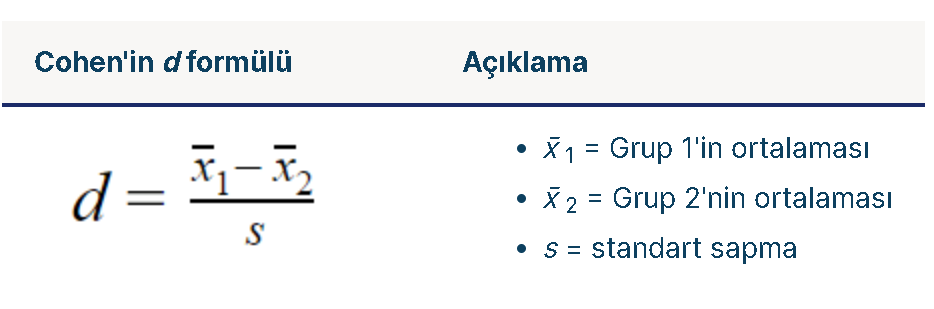

Effect size'ın negatif çıkması ortalaması alınan grupların sırasının değiştirilmesi gerektiğini gösterir çünkü effect size negatif olamaz. Bu sebeple tüm sonunçların mutlak değerini alıp değerlendirme yapacak olursak şöyle bir tabloyla karışılaşıyoruz. Buna göre de bu 3 sütun içerisinde radius_mean ile compactness_mean arasında diğerlerinden daha güçlü bir etki olduğunu gösteriyor.
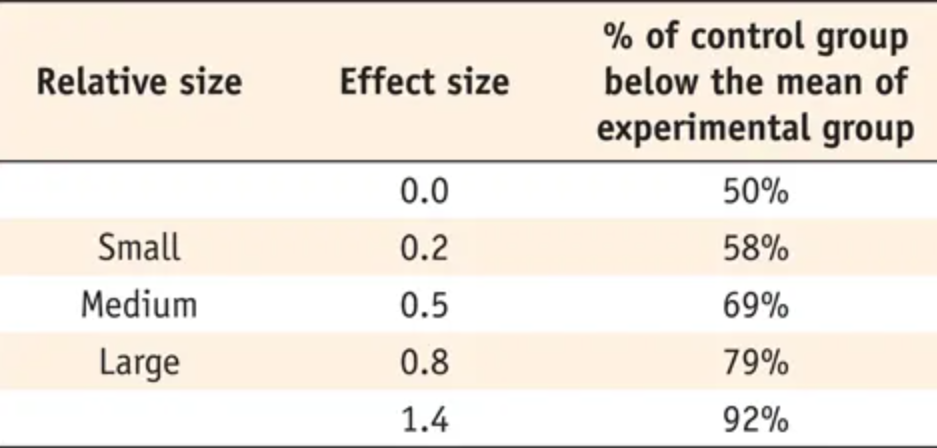

# Soru 4: Bayes Teoreminin gerçek hayatta karşımıza çıkan ve kullanılan örneklerinden 5 tane bulalım.

1. 50 yaş üzeri kadınların meme kanseri olma ihtimalinin hesaplanması
2. Belirli bir ağrı kliniğinde hastaların bir kısmına narkotik ağrı kesiciler reçete edilir. Genel olarak, klinik hastalarının belli bir kısmı narkotiklere (ağrı kesiciler ve yasa dışı maddeler dahil) bağımlıdır. Ağrı kesici reçete edilen tüm insanların da bir kısmı bağımlıdır. Bir hasta bağımlıysa, kendisine ağrı kesici reçete edilme olasılığı bulunabilir.
3. Bir torbada 5 kırmızı ve 5 siyah bilye vardır. Rastgele bir top çekiliyor, rengi not ediliyor ve top tekrar torbaya geri dönüyor. Ayrıca çizilen renkteki 2 top daha torbaya konur. Daha sonra top torbadan rastgele çekiliyor. Torbadan çekilen ikinci topun kırmızı olma olasılığı bulunabilir.
4. Üniversite öğrencilerin %60'ı yurtta kalmakta ve öğrencilerin %40'ı gündüzlü bursiyerlerdir. Önceki yıl sonuçları, pansiyonda kalan tüm öğrencilerin %30'unun A notu aldığını ve gündüz bursiyerlerinin %20'sinin A notu aldığını bildirmektedir. Yıl sonunda rastgele bir öğrenci seçilir ve A notu olduğu tespit edilir. Öğrencinin yurtta kalma olasılığı bulunabilir.
5. İskambil kartlarının bulunduğu desteden çekilen 2 kartın ikisinin de maça gelme ihtimali bulunabilir.

# Soru 5: Poisson, Normal, Gamma, Weilbull ve Logaritmik dağılımların benzer ve farklı yönlerini bir tablo halinde çıkaralım.


### Poisson
1. Herhangi bir başarılı olay, başka bir başarılı olayın sonucunu etkilememelidir.
2. Kısa bir aralıkta başarı olasılığı, daha uzun bir aralıkta başarı olasılığına eşit olmalıdır.
3. Bir aralıkta başarı olasılığı, aralık küçüldükçe sıfıra yaklaşır.

### Normal
1. Ortalama, medyan ve dağılımın modu çakışmaktadır.
2. Dağılımın eğrisi çan şeklindedir ve x=μ doğrusuna göre simetriktir.
3. Eğrinin altındaki toplam alan 1'dir.
4. Değerlerin tam olarak yarısı merkezin solunda ve diğer yarısı sağdadır.

### Gamma
 1. Gama dağılımı, olay süreci tamamen rastgele olmadığında, olayların meydana gelmeleri arasındaki süreyi ölçmek için de kullanılır.
 2. Gama dağılımının diğer uygulamaları, envanter kontrolü, ekonomik teori ve sigorta risk teorisini içerir.
 3. Herhangi bir ölçü birimindeki olası olay sayısı sabit bir sayı ile sınırlı değildir, olaylar bağımsızdır, bir ölçü birimindeki olay sayısı diğer birimlerdeki olay sayısını etkilemez ve ortalama olay sayısı birimden birime aynı kalır.

### Weilbull
1. Weibull dağılımı, ömür ve yorulma testlerinden elde edilen verileri tanımlar.
2. Güvenilirlik çalışmalarında hata süresini ve ayrıca güvenilirlik ve kalite kontrol testlerinde malzemelerin kırılma mukavemetlerini tanımlamak için yaygın olarak kullanılır.
3. Weibull dağılımları, rüzgar hızı gibi çeşitli fiziksel nicelikleri temsil etmek için de kullanılır.
4. Weibull dağılımı, diğer birçok dağılımın özelliklerini üstlenebilen bir dağılım ailesidir.

### Logaritmik
1. Değerlerin pozitif olarak çarpık olduğu durumlarda, örneğin menkul kıymet değerlemesi için finansal analizde veya mülk değerlemesi için gayrimenkulde ve değerlerin sıfırın altına düşemediği durumlarda kullanılır (örneğin, hisse senedi fiyatları ve gayrimenkul fiyatları genellikle Normal veya simetrik olarak dağıtılır ve sıfırın alt sınırının altına düşemez, ancak sınırsız herhangi bir fiyata yükselebilir).

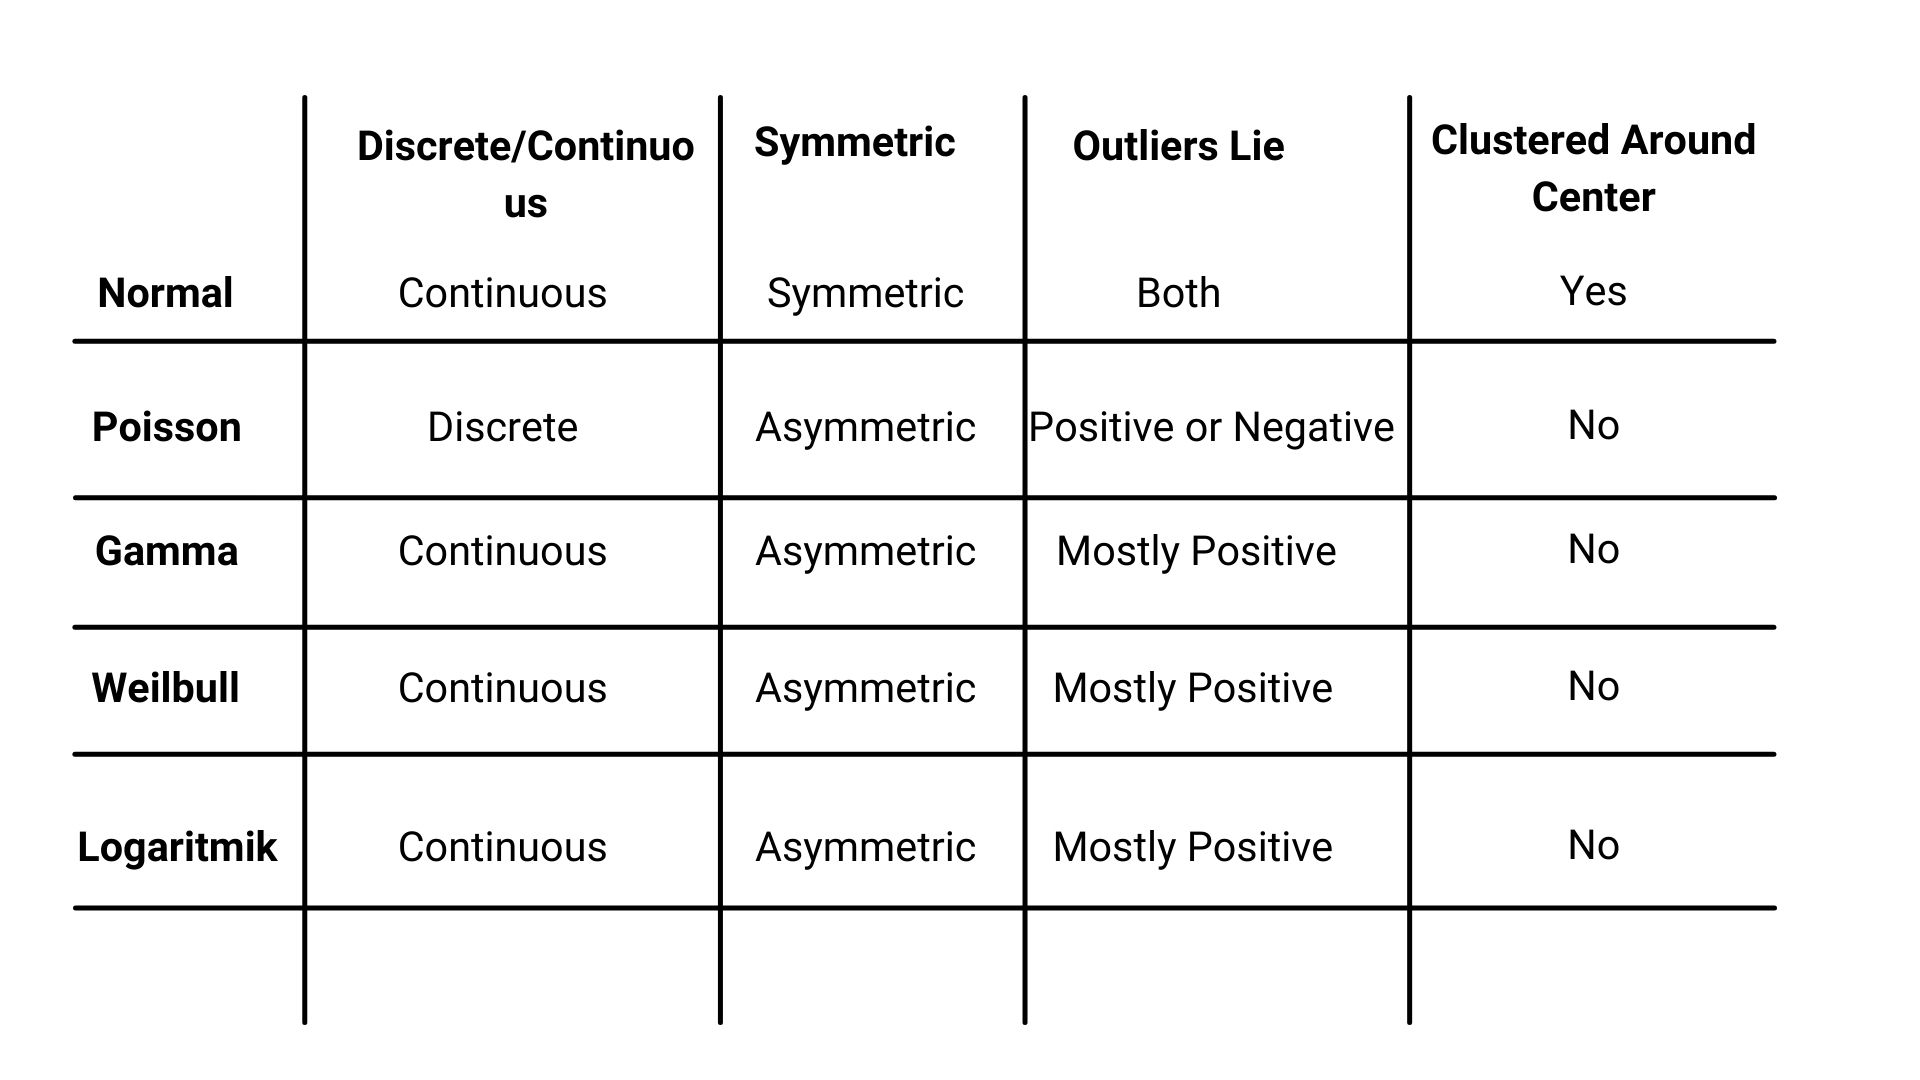